In [1]:
import jsonpickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f = open("datawig-results.jsonpickle","r")
datawig_results = jsonpickle.decode(f.read())
f.close()

f = open("no-results.jsonpickle","r")
no_imp_results = jsonpickle.decode(f.read())
f.close()

f = open("mode-results.jsonpickle","r")
mode_results = jsonpickle.decode(f.read())
f.close()

/home/ssc/Entwicklung/projects/jenga/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ssc/Entwicklung/projects/jenga/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ssc/Entwicklung/projects/jenga/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ssc/Entwicklung/projec

In [3]:
def find_result(column, fraction, missingness, results):
    for result in results:
        corr = result.corruption
        if corr.column == column and corr.fraction == fraction and corr.missingness == missingness:
            return result

In [4]:
def plot_impact(column, plt, missingness, suffix=''):
    ax = plt.gca()
    
    scores = []

    for impacted_column in [column]:
        for fraction in [0.01, 0.1, 0.5, 0.99]:
            #for missingness in ['MCAR', 'MAR', 'MNAR']:        
            #for missingness in ['MNAR', 'MAR', 'MCAR']: 
            for results in [no_imp_results, mode_results, datawig_results]:
                result = find_result(impacted_column, fraction, missingness, results)
                scores.append(result.corrupted_scores)
                #labels.append(f"{missingness} {int(fraction*100)}%")


    baseline_score = result.baseline_score            
    
    plots = []

    l = ax.axhline(baseline_score, linestyle='--', color='black')
    #bplot = ax.boxplot(scores, showfliers=False, patch_artist=True, medianprops={'color':'black'})
    for index, score in enumerate(scores, 1):
        t_score = np.random.choice(score, 10)
        
        colors = ['#1e4052', '#dc6082', '#e1a677']    
        
        offset = (index - 1) % 3
        color = colors[offset]
        
        corr = 0
        if offset == 0:
            corr = .5
        elif offset == 2:
            corr = -.5
        
        p = plt.scatter(np.ones(len(t_score)) * (index + corr), t_score, facecolors='none', edgecolor=color)
        plots.append(p)

        
    ax.yaxis.grid(True)

    ax.set_xticks([2, 5, 8, 11])
    ax.set_xticklabels(['1%', '10%', '50%', '99%'])

    ax.set_ylim((0.79, 0.895))
    ax.set_title(f"{column} ({missingness})", fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=22)
    ax.tick_params(axis='both', which='minor', labelsize=22)    
    ax.set_ylabel('AUC', fontsize=24)
    ax.set_xlabel('fraction', fontsize=24)
    
    ax.legend([l] + plots[:3], ['clean data', 'placeholder', 'mode', 'datawig'], fontsize=16)
    
    plt.tight_layout()
    plt.gcf().set_size_inches(7, 5)

    plt.gcf().savefig(f'/home/ssc/nextcloud/papers/jenga/figures/missing-{column}-{missingness.lower()}.pdf', dpi=300)
    plt.show()

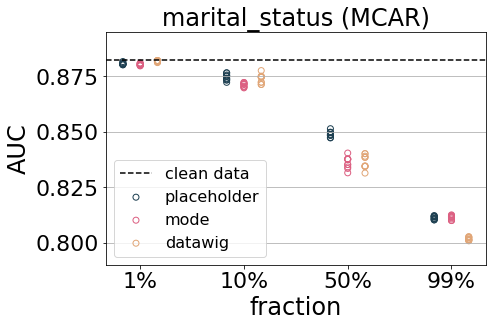

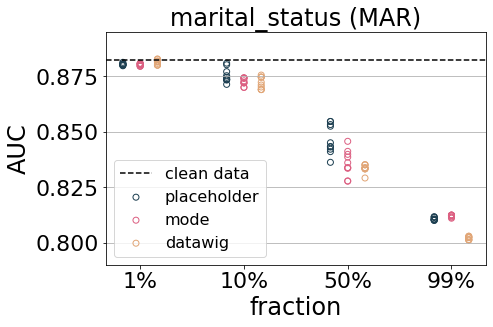

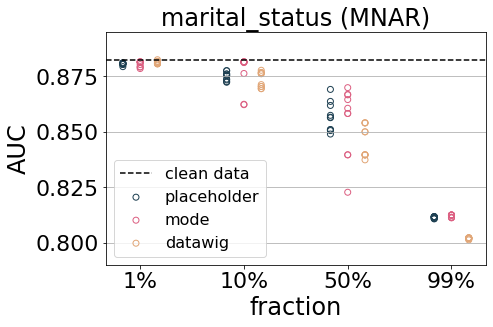

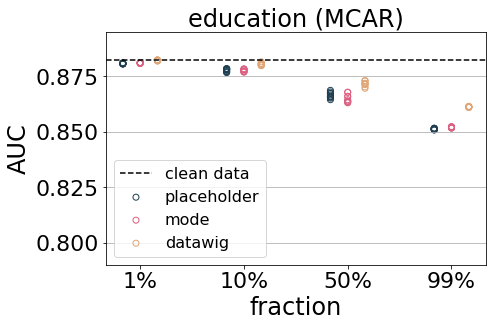

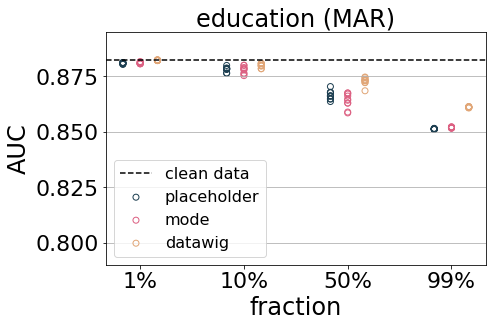

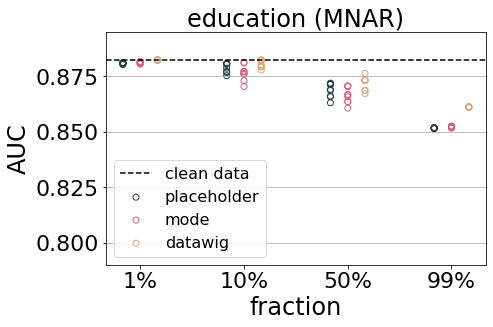

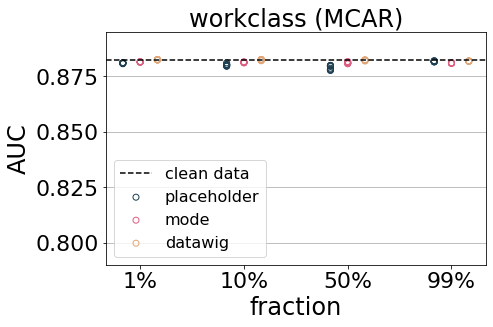

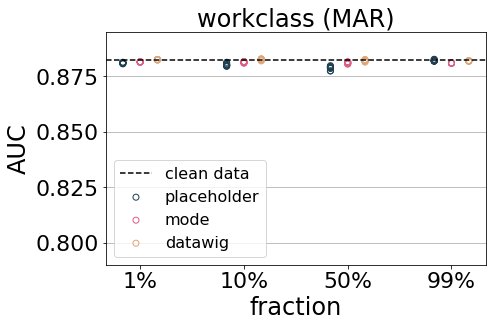

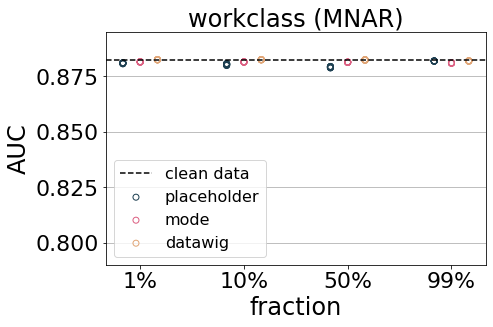

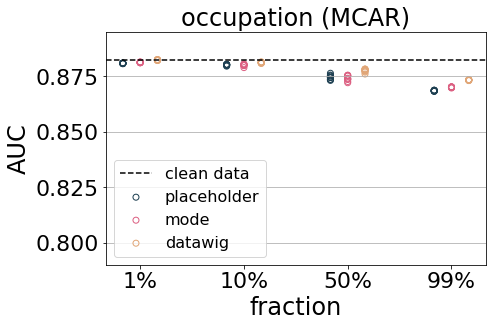

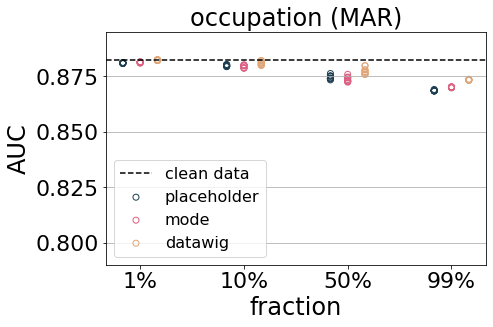

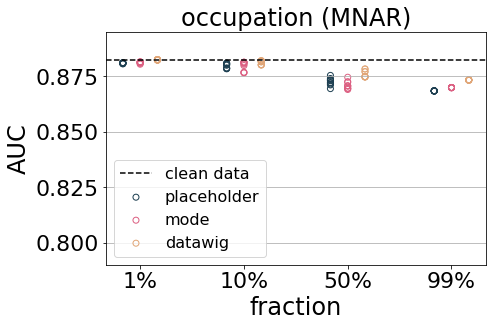

In [5]:
for column in ['marital_status', 'education', 'workclass', 'occupation']:
    for missingness in ['MCAR', 'MAR', 'MNAR']:
        plot_impact(column, plt, missingness)


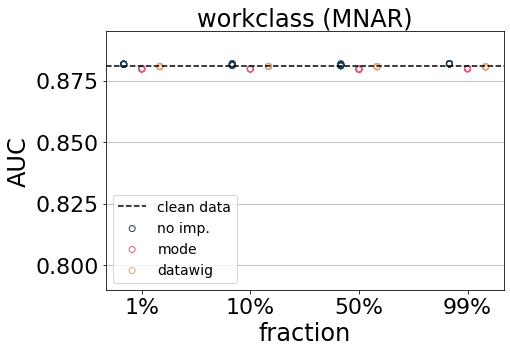

In [96]:
plot_impact('workclass', plt, 'MNAR')

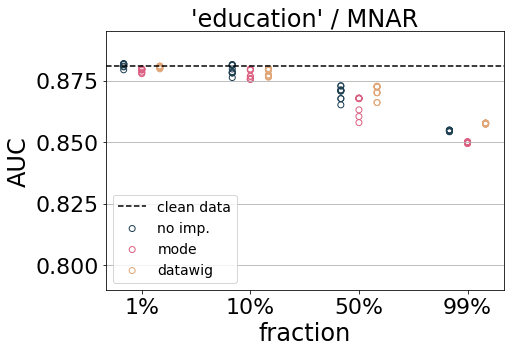

In [91]:
plot_impact('education', plt, 'MNAR')

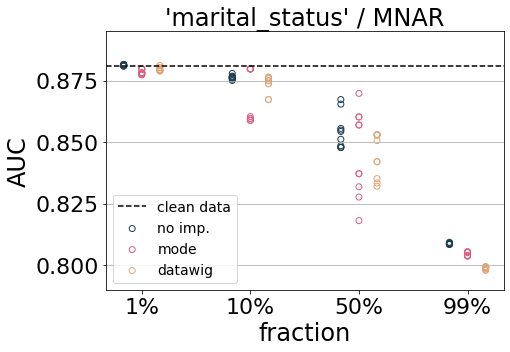

In [92]:
plot_impact('marital_status', plt, 'MNAR')